In [1]:
import numpy as np
import os
import shutil
import matplotlib
import matplotlib.pyplot as plt

import sys
from osgeo import ogr
from osgeo import osr
from osgeo import gdal
sys.path.append("//home/goel65/python/lib")
import rs3 as rs

import time
import glob
import pickle

In [2]:
Piute = {
    "Xmax" : -111.76628273950942,
    "Xmin" : -112.5197057381439,
    "Ymax" : 38.51244321480291,
    "Ymin" : 38.145371577379684,
    "spatial_resolution" :  0.00031021562683723573
}

Piute['ncols'] = int((Piute['Xmax'] - Piute['Xmin'])/ Piute['spatial_resolution'])
Piute['nrows'] = int((Piute['Ymax'] - Piute['Ymin'])/ Piute['spatial_resolution'])

In [3]:
all_files = glob.glob('//scratch/bell/goel65/TGARS_Rev/piute/sentinel1/S1*')
all_files.sort()

In [4]:
files = [x for x in all_files if 'S1A' in x]
files.sort()

In [5]:
sen = rs.RSImage(files[0])


//scratch/bell/goel65/TGARS_Rev/piute/sentinel1/S1A_IW_GRDH_1SDV_20221106T132657_20221106T132722_045774_0579B5_500B.tif


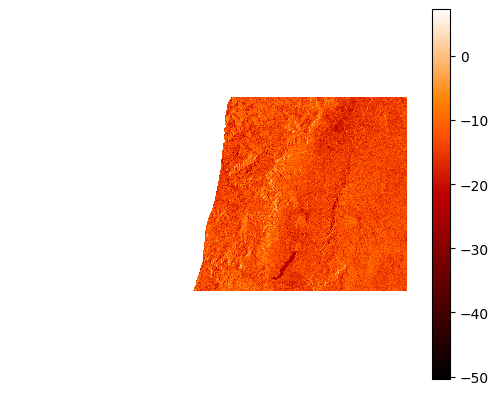

//scratch/bell/goel65/TGARS_Rev/piute/sentinel1/S1A_IW_GRDH_1SDV_20221111T133506_20221111T133531_045847_057C2C_F4EA.tif


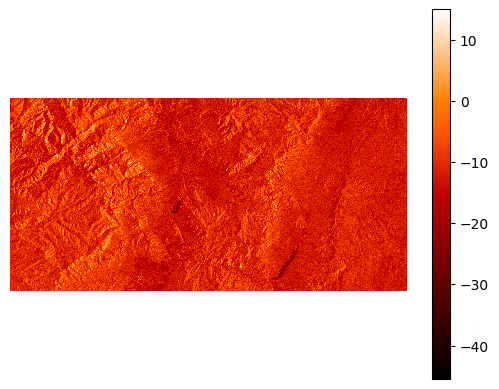

//scratch/bell/goel65/TGARS_Rev/piute/sentinel1/S1A_IW_GRDH_1SDV_20221118T132657_20221118T132722_045949_057F9A_656A.tif


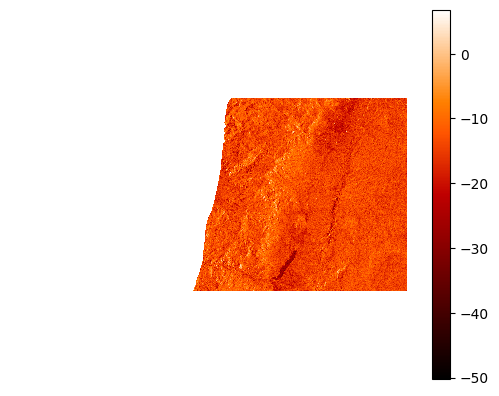

//scratch/bell/goel65/TGARS_Rev/piute/sentinel1/S1A_IW_GRDH_1SDV_20221123T133506_20221123T133531_046022_058218_5311.tif


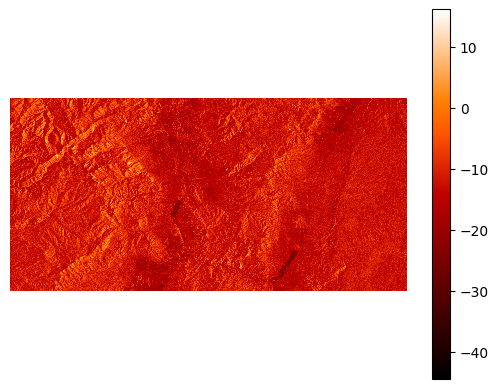

//scratch/bell/goel65/TGARS_Rev/piute/sentinel1/S1A_IW_GRDH_1SDV_20221130T132656_20221130T132721_046124_05858D_FD14.tif


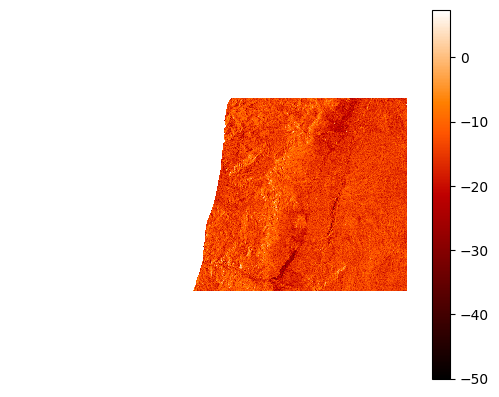

//scratch/bell/goel65/TGARS_Rev/piute/sentinel1/S1A_IW_GRDH_1SDV_20221205T133505_20221205T133530_046197_05880D_DC85.tif


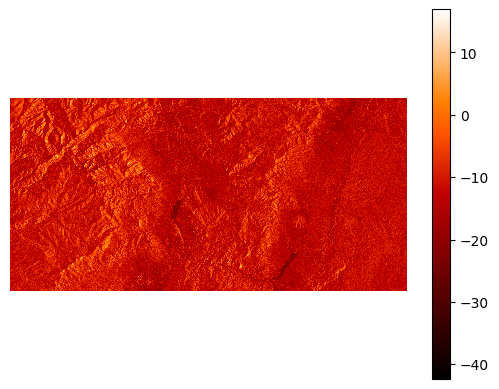

//scratch/bell/goel65/TGARS_Rev/piute/sentinel1/S1A_IW_GRDH_1SDV_20221212T132656_20221212T132721_046299_058B83_205B.tif


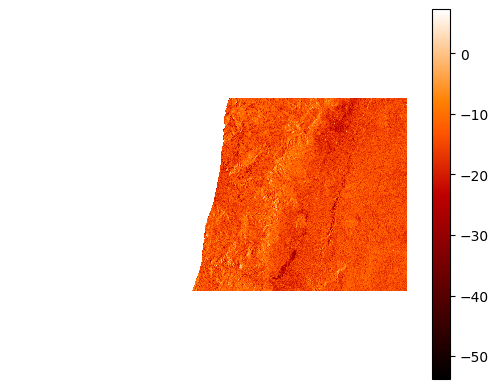

//scratch/bell/goel65/TGARS_Rev/piute/sentinel1/S1A_IW_GRDH_1SDV_20221217T133504_20221217T133529_046372_058E04_DABB.tif


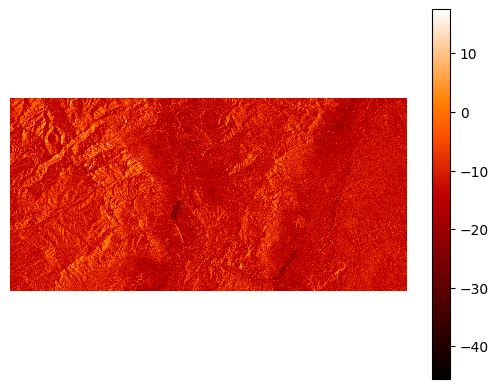

//scratch/bell/goel65/TGARS_Rev/piute/sentinel1/S1A_IW_GRDH_1SDV_20221224T132655_20221224T132720_046474_05917F_EB75.tif


KeyboardInterrupt: 

In [26]:
for file in files[-10:]:
    print(file)
    sen = rs.RSImage(file)
    sen.show_image()


### Half of the files have partial imagery 

In [22]:
print(sen.ext_left - Piute['Xmin'])
print(sen.ext_right - Piute['Xmax'])
print(sen.ext_up - Piute['Ymax'])
print(sen.ext_down - Piute['Ymin'])

0.00014684741229586962
-3.878548795910319e-05
-0.00013984861601556986
0.00023948982961741194


In [16]:
valid_files = []
for file in files: 
    sen = rs.RSImage(file)
    arr = sen.img
    if np.isnan(arr).sum() < 100000:
        valid_files.append(file)

In [17]:
len(valid_files)

85

In [18]:
file_identifiers = []

for filename in valid_files:
    iden = filename.split('/')[-1].split('_')[4]
    file_identifiers.append(iden)

In [19]:
for iden, filename in zip(file_identifiers, valid_files):
    main_dir = '//scratch/bell/goel65/TGARS_Rev/piute/sentinel1/'
    b1_dir = main_dir + 'B1/'
    b2_dir = main_dir + 'B2/'
    
    if not os.path.exists(b1_dir):
        os.makedirs(b1_dir)
        
    if not os.path.exists(b2_dir):
        os.makedirs(b2_dir)
    
    print(f'{iden}')
    
    sen = rs.RSImage(filename)
    
    np.save(b1_dir + iden + '_B1.npy', sen.img[0])
    np.save(b2_dir + iden + '_B2.npy', sen.img[1])

20200102T133454
20200114T133453
20200126T133453
20200207T133453
20200219T133452
20200302T133452
20200314T133452
20200326T133453
20200407T133453
20200419T133453
20200501T133454
20200513T133455
20200525T133455
20200606T133456
20200630T133457
20200712T133458
20200724T133459
20200805T133459
20200817T133500
20200829T133501
20200910T133501
20200922T133502
20201004T133502
20201016T133502
20201028T133502
20201109T133502
20201121T133502
20201203T133501
20201215T133501
20201227T133500
20210108T133500
20210120T133459
20210201T133459
20210213T133458
20210225T133458
20210309T133458
20210321T133458
20210402T133459
20210414T133459
20210426T133500
20210508T133500
20210520T133501
20210601T133501
20210613T133502
20210625T133503
20210707T133504
20210719T133504
20210731T133505
20210812T133506
20210824T133506
20210905T133507
20210917T133507
20210929T133508
20211011T133508
20211023T133508
20211104T133508
20211128T133507
20211210T133507
20211222T133506
20220103T133505
20220115T133505
20220127T133504
20220208

In [20]:
main_dir = '//scratch/bell/goel65/TGARS_Rev/piute/sentinel1/'
b1_files = glob.glob(main_dir + 'B1/*')
b1_files.sort()
b2_files = glob.glob(main_dir + 'B2/*')
b2_files.sort()

In [21]:
len(b1_files)

85

In [22]:
len(b2_files)

85

In [31]:
sen = rs.RSImage(all_files[0])
metadata = sen.geotransform

sen_metadata = {
    'Xmin': metadata[0],
    'Ymax': metadata[3],
    'spatial_resolution':metadata[1],
    'ncols': sen.ncol,
    'nrows': sen.nrow,
    'Xmax': metadata[0] + metadata[1]*sen.ncol,
    'Ymin': metadata[3] - metadata[1]*sen.nrow
}

In [32]:
print(Piute['spatial_resolution']/sen_metadata['spatial_resolution'])
print(sen_metadata['ncols']/Piute['ncols'])
print(sen_metadata['nrows']/Piute['nrows'])

3.453304561563725
3.4534596375617794
3.4505494505494507


In [24]:
b1 = np.load(b1_files[20])
b1.shape

(4082, 8385)

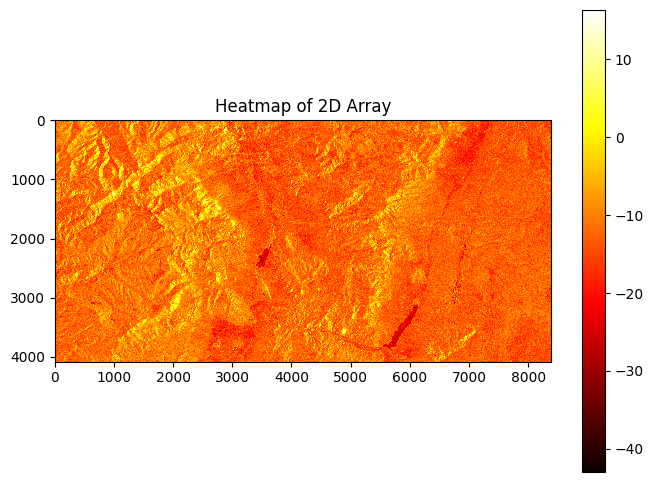

In [25]:
plt.figure(figsize=(8, 6))
plt.imshow(b1, cmap='hot', interpolation='nearest')
plt.colorbar()  # adds a color bar to indicate the scale
plt.title('Heatmap of 2D Array')
plt.show()

In [33]:
### Reprojecting the sentinel 1 bands to the projection of our HLS data product. 
### The spatial resolution of sentinel 1 is 3.5 times smaller than of HLS data product. 
### To fill each pixel of the HLS raster, we take a 5X5 window of sentinel 1 raster and calculate the mean. 
def sen1_to_HLS_raster(band, Location, sen_metadata):
    
    band_repurp = np.zeros([Location['nrows'], Location['ncols']])
    
    for i in range(Location["nrows"]):
        
        for j in range(Location['ncols']):

            long = Location['Xmin'] + (j+0.5)*Location['spatial_resolution']
            lat = Location['Ymax'] - (i+0.5)*Location['spatial_resolution']

            if(long<sen_metadata['Xmin'] or long>sen_metadata['Xmax'] or lat<sen_metadata['Ymin'] or lat>sen_metadata['Ymax']):continue

            xind = int((long - sen_metadata['Xmin'])/sen_metadata['spatial_resolution'])
            yind = int((sen_metadata['Ymax'] - lat)/sen_metadata['spatial_resolution'])
            #print(xind, yind)

            if xind<0 or xind>=sen_metadata['ncols']:continue
            if yind<0 or yind>=sen_metadata['nrows']:continue

            value_sum = 0
            value_count = 0
            

            for a in np.arange(-2,3):
                for b in np.arange(-2,3):

                    curr_xind = xind + a
                    curr_yind = yind + b

                    if curr_xind<0 or curr_xind>=sen_metadata['ncols']:continue
                    if curr_yind<0 or curr_yind>=sen_metadata['nrows']:continue

                    value_sum += band[curr_yind, curr_xind]
                    value_count += 1 

            value = value_sum/value_count
            #print(value)
            band_repurp[i,j] = value
    
    return band_repurp

In [34]:
for i,file in enumerate(b1_files):
    
    main_dir = '//scratch/bell/goel65/TGARS_Rev/piute/sentinel1/'
    b1_dir = main_dir + 'B1_reproj/'
    
    if not os.path.exists(b1_dir):
        os.makedirs(b1_dir)

    band = np.load(file)
    name = file.split('/')[-1]
    reprojected = sen1_to_HLS_raster(band, Piute, sen_metadata)
    np.save(b1_dir + 'reprojected_' + name, reprojected)
    print(f'{i})Reprojected file - {name}')

0)Reprojected file - 20200102T133454_B1.npy
1)Reprojected file - 20200114T133453_B1.npy
2)Reprojected file - 20200126T133453_B1.npy
3)Reprojected file - 20200207T133453_B1.npy
4)Reprojected file - 20200219T133452_B1.npy
5)Reprojected file - 20200302T133452_B1.npy
6)Reprojected file - 20200314T133452_B1.npy
7)Reprojected file - 20200326T133453_B1.npy
8)Reprojected file - 20200407T133453_B1.npy
9)Reprojected file - 20200419T133453_B1.npy
10)Reprojected file - 20200501T133454_B1.npy
11)Reprojected file - 20200513T133455_B1.npy
12)Reprojected file - 20200525T133455_B1.npy
13)Reprojected file - 20200606T133456_B1.npy
14)Reprojected file - 20200630T133457_B1.npy
15)Reprojected file - 20200712T133458_B1.npy
16)Reprojected file - 20200724T133459_B1.npy
17)Reprojected file - 20200805T133459_B1.npy
18)Reprojected file - 20200817T133500_B1.npy
19)Reprojected file - 20200829T133501_B1.npy
20)Reprojected file - 20200910T133501_B1.npy
21)Reprojected file - 20200922T133502_B1.npy
22)Reprojected file 

In [35]:
for i,file in enumerate(b2_files):
    
    main_dir = '//scratch/bell/goel65/TGARS_Rev/piute/sentinel1/'
    b2_dir = main_dir + 'B2_reproj/'
    
    if not os.path.exists(b2_dir):
        os.makedirs(b2_dir)

    band = np.load(file)
    name = file.split('/')[-1]
    reprojected = sen1_to_HLS_raster(band, Piute, sen_metadata)
    np.save(b2_dir + 'reprojected_' + name, reprojected)
    print(f'{i})Reprojected file - {name}')

0)Reprojected file - 20200102T133454_B2.npy
1)Reprojected file - 20200114T133453_B2.npy
2)Reprojected file - 20200126T133453_B2.npy
3)Reprojected file - 20200207T133453_B2.npy
4)Reprojected file - 20200219T133452_B2.npy
5)Reprojected file - 20200302T133452_B2.npy
6)Reprojected file - 20200314T133452_B2.npy
7)Reprojected file - 20200326T133453_B2.npy
8)Reprojected file - 20200407T133453_B2.npy
9)Reprojected file - 20200419T133453_B2.npy
10)Reprojected file - 20200501T133454_B2.npy
11)Reprojected file - 20200513T133455_B2.npy
12)Reprojected file - 20200525T133455_B2.npy
13)Reprojected file - 20200606T133456_B2.npy
14)Reprojected file - 20200630T133457_B2.npy
15)Reprojected file - 20200712T133458_B2.npy
16)Reprojected file - 20200724T133459_B2.npy
17)Reprojected file - 20200805T133459_B2.npy
18)Reprojected file - 20200817T133500_B2.npy
19)Reprojected file - 20200829T133501_B2.npy
20)Reprojected file - 20200910T133501_B2.npy
21)Reprojected file - 20200922T133502_B2.npy
22)Reprojected file 